In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functions import get_filepath, find_clustered_orfs, find_orfs, find_orfs_from_cluster, find_cluster_from_orf
from functions import samples_from_soils, perturbed_pHs, native_pH, enriched_native_pH, perturbed_pH_sample, plot

DATDIR = '/projects/p32818/metagenomic_data/data'

soils = ['Soil3', 'Soil5', 'Soil9', 'Soil11', 'Soil12', 'Soil14', 'Soil15', 'Soil16', 'Soil17'] #no soil 6 here

I will repeat the analysis done on nar and try to find a hierarchical grouping which includes T9 data

In [5]:
drug = 'None'

cluster_ids = pd.read_csv(f'out/orf_ids/cluster_ids_09_nap.tsv')
cluster_ids = cluster_ids.values
clustered_data = pd.read_csv(f'out/K02567abundances/T0data_09_{drug}_K02567.tsv', sep='\t', header=None)
old_data = clustered_data.values
data = old_data / old_data.sum(axis=1, keepdims=True)

abs_data = old_data

id_list = []

for soil in soils:
    filename = f"out/K02567abundances/{soil}data_09_{drug}_K02567.tsv"  # Construct the filename
    df = pd.read_csv(filename, sep='\t', header = None)
    df = df.values
    abs_df = df
    df = df / df.sum(axis = 1, keepdims=True)
    abs_data = np.hstack((abs_data, abs_df))
    data = np.hstack((data, df))
    
data = np.nan_to_num(data, nan = 0)

filtered_data = []
absolute_data = []
for i, datum in enumerate(data):
    score = 0
    for entry in datum:
        if entry != 0:
            score += 1
    if score > 0:
        filtered_data.append(datum)
        absolute_data.append(abs_data[i])
        id_list.append([i, cluster_ids[i][0]])
        

        
filtered_data = [list(arr) for arr in filtered_data]
absolute_data = [list(arr) for arr in absolute_data]

plt.figure(figsize=(10,10))
plt.imshow(filtered_data, cmap = 'Blues')
plt.xlabel('samples')
plt.ylabel('Clustered ORFs')

for id in id_list:
    print(id[1])

'''
plt.figure(figsize=(10,10))
plt.imshow(filtered_data, cmap = 'Blues')
plt.xlabel('samples')
plt.ylabel('Clustered ORFs')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_data)

# Generate colors based on row index
row_indices = np.arange(principal_components.shape[0])
colors = plt.cm.seismic(row_indices / row_indices.max())

# Plot the first two principal components with row index labels
plt.figure(figsize=(10, 8))
for i in range(principal_components.shape[0]):
    if (i < 35):
        plt.scatter(principal_components[i, 0], principal_components[i, 1], color='blue')
        plt.text(principal_components[i, 0] + 0.1, principal_components[i, 1] + 0.1 , str(i), fontsize=8, ha='right', va='bottom')
    if (i > 35):
        plt.scatter(principal_components[i, 0], principal_components[i, 1], color='red')
        plt.text(principal_components[i, 0] + 0.1, principal_components[i, 1] + 0.1 , str(i), fontsize=8, ha='right', va='bottom')


plt.xlabel('Principal Component 1 (13%)')
plt.ylabel('Principal Component 2 (10%)')
plt.title('PCA of Gene Variants under Different pH Conditions')
plt.grid(True)
plt.tight_layout()
plt.show()



for i, ratio in enumerate(pca.explained_variance_ratio_, start=1):
    #plt.scatter(i, ratio)
    print(f"Principal Component {i}: {ratio * 100:.2f}%")
'''

/var/folders/_1/szp4571s76d__d0kyyc1stgc0000gn/T/ipykernel_32570/3411467190.py:7: RuntimeWarning: invalid value encountered in divide
  data = old_data / old_data.sum(axis=1, keepdims=True)
/var/folders/_1/szp4571s76d__d0kyyc1stgc0000gn/T/ipykernel_32570/3411467190.py:18: RuntimeWarning: invalid value encountered in divide
  df = df / df.sum(axis = 1, keepdims=True)
/var/folders/_1/szp4571s76d__d0kyyc1stgc0000gn/T/ipykernel_32570/3411467190.py:18: RuntimeWarning: invalid value encountered in divide
  df = df / df.sum(axis = 1, keepdims=True)
/var/folders/_1/szp4571s76d__d0kyyc1stgc0000gn/T/ipykernel_32570/3411467190.py:18: RuntimeWarning: invalid value encountered in divide
  df = df / df.sum(axis = 1, keepdims=True)
/var/folders/_1/szp4571s76d__d0kyyc1stgc0000gn/T/ipykernel_32570/3411467190.py:18: RuntimeWarning: invalid value encountered in divide
  df = df / df.sum(axis = 1, keepdims=True)
/var/folders/_1/szp4571s76d__d0kyyc1stgc0000gn/T/ipykernel_32570/3411467190.py:18: RuntimeWarn

IndexError: index 94 is out of bounds for axis 0 with size 94

In [43]:
Nap = np.zeros(119)
for row in absolute_data:
    Nap += row
    
NapT0 = 0
NapT9 = 0
i = 0
while i < 20:
    NapT0 += Nap[i]
    i += 1
while i < 119:
    NapT9 += Nap[i]
    i+= 1
print('T0 Nap abundance', NapT0)
print('T9 Nap abundance', NapT9)


T0 Nap abundance 1.06504
T9 Nap abundance 8.863169000000005


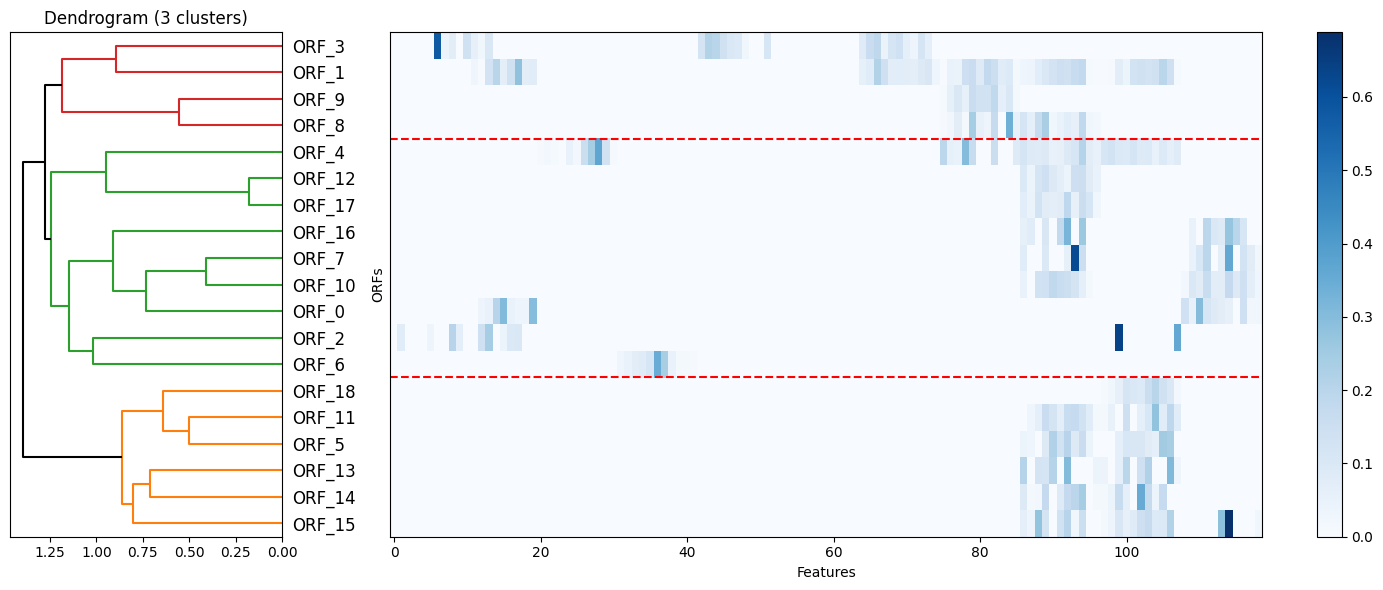

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, optimal_leaf_ordering
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler


filtered_data = np.array(filtered_data)  

scaler = StandardScaler()
data_scaled = scaler.fit_transform(filtered_data)  

#Hierarchical clustering
Z = linkage(data_scaled, method='complete', metric='correlation')
Z_optimal = optimal_leaf_ordering(Z, pdist(data_scaled, metric='correlation'))


n_clusters = 3
clusters = fcluster(Z_optimal, t=n_clusters, criterion='maxclust')

#leaf ordering
dendro = dendrogram(Z_optimal, no_plot=True)
leaf_indices = dendro['leaves']  


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 4]})


dendrogram(Z_optimal, orientation='left', ax=ax1,
           color_threshold=max(Z_optimal[-n_clusters+1, 2], 0.1),
           above_threshold_color='k',
           labels=[f"ORF_{i}" for i in range(len(filtered_data))])

ax1.set_title(f'Dendrogram ({n_clusters} clusters)')

im = ax2.imshow(filtered_data[leaf_indices], aspect='auto', cmap='Blues',
                interpolation='nearest', origin = 'lower')
plt.colorbar(im, ax=ax2)

#boundaries
boundaries = np.where(np.diff(clusters[leaf_indices]))[0]
for b in boundaries:
    ax2.axhline(b+0.5, color='red', linestyle='--')

ax2.set_xlabel('Features')
ax2.set_ylabel('ORFs')
ax2.set_yticks([])
plt.tight_layout()
plt.show()

[ 5 14]
(19, 119)


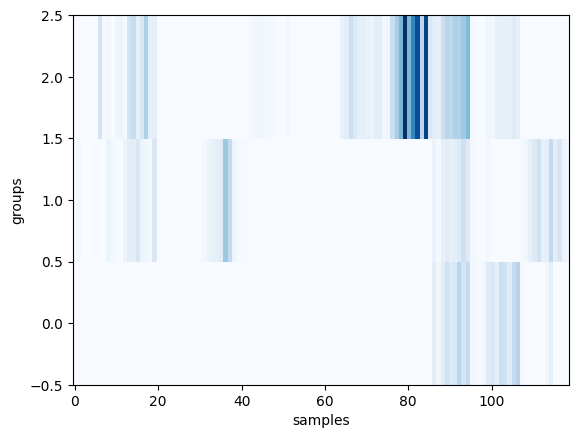

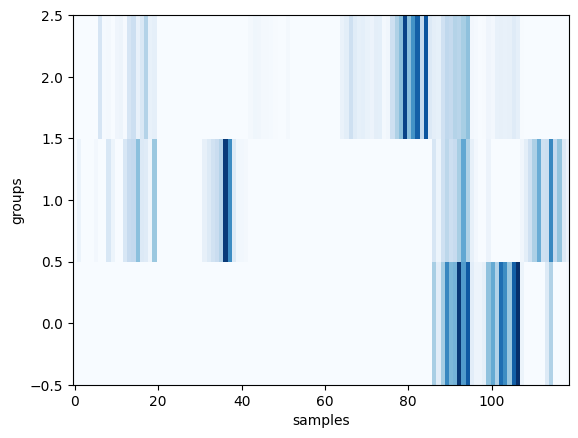

In [34]:
absolute_data = np.array(absolute_data)
filtered_data = np.array(filtered_data)
new_data = filtered_data[leaf_indices]
new_absolute_data = absolute_data[leaf_indices]

print(boundaries)

groups = np.zeros((3,119))
print(new_absolute_data.shape)

for i, datum in enumerate(new_absolute_data):
    if i < boundaries[0]:
        groups[0] += datum
    elif i > boundaries[0] and i < boundaries[1]:
        groups[1] += datum
    elif i > boundaries[1]:
        groups[2] += datum

        
plt.show()
plt.imshow(groups, cmap = 'Blues', origin = 'lower', aspect = 'auto')
plt.xlabel('samples')
plt.ylabel('groups')
plt.show()

norm_groups = groups / groups.sum(axis=1, keepdims=True)

plt.imshow(norm_groups, cmap = 'Blues', origin = 'lower', aspect = 'auto')
plt.xlabel('samples')
plt.ylabel('groups')
plt.show()



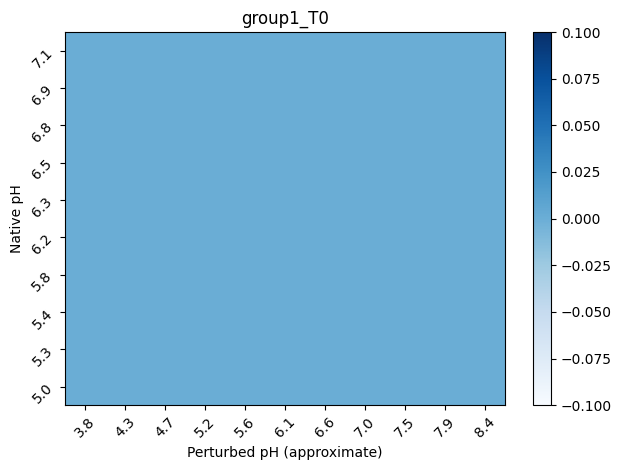

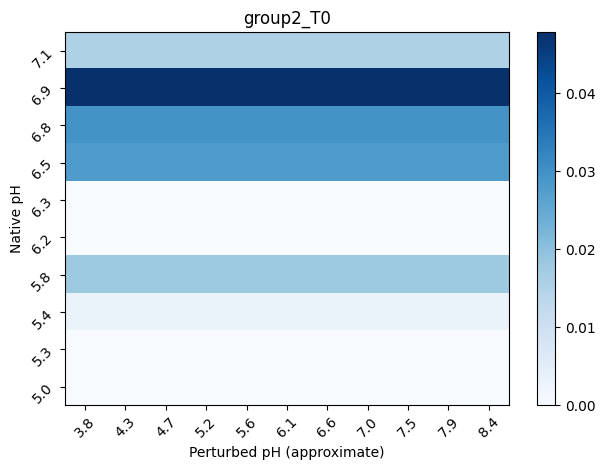

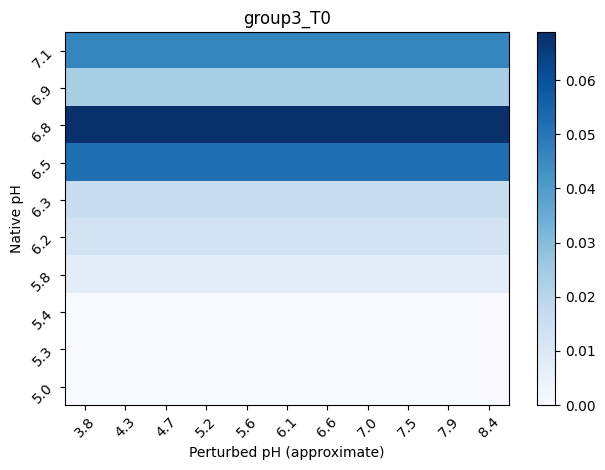

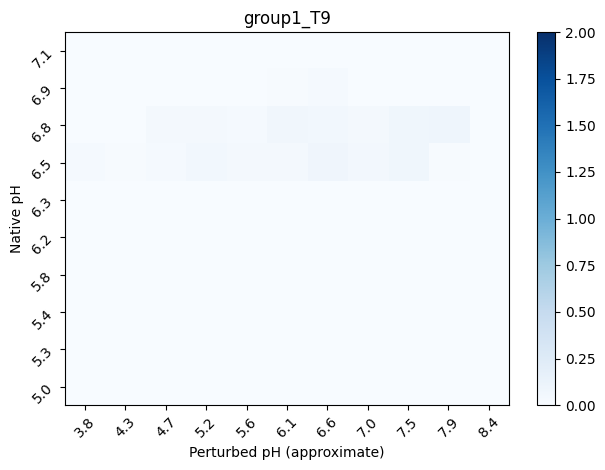

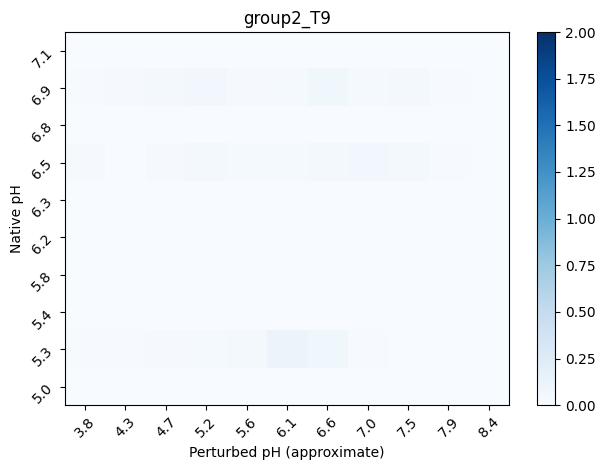

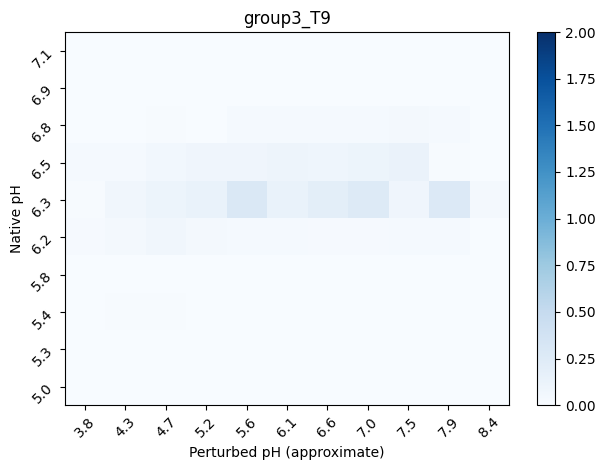

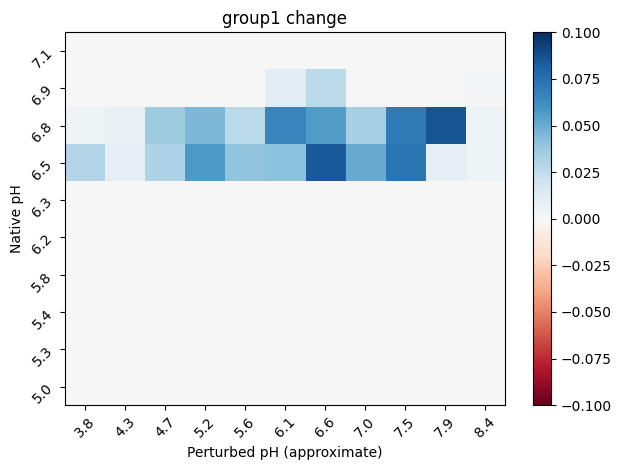

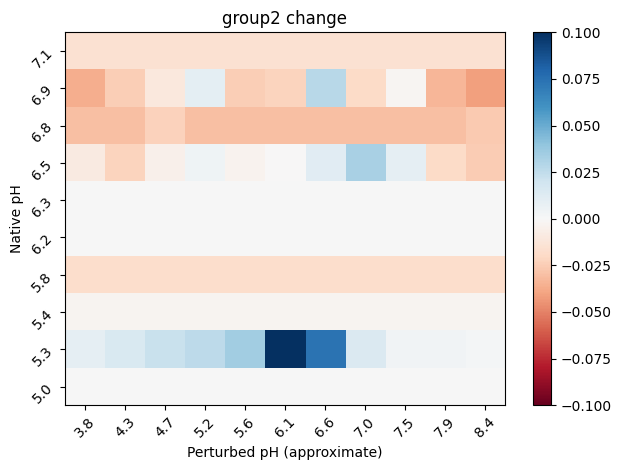

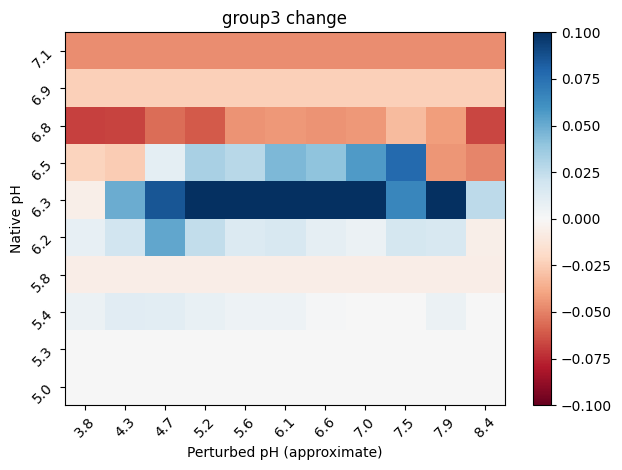

In [35]:
selected = [2, 4, 5, 8, 10, 11, 13, 14, 15, 16]

#T0
group1_T0 = np.zeros((10,11))
group2_T0 = np.zeros((10,11))
group3_T0 = np.zeros((10,11))

for i in range(10): #native pH
    group1_T0[i] = groups[0][selected][i]
    group2_T0[i] = groups[1][selected][i]
    group3_T0[i] = groups[2][selected][i]
        
plot(group1_T0, 'group1_T0')
plot(group2_T0, 'group2_T0')
plot(group3_T0, 'group3_T0')

#T9
group1_T9 = np.zeros((10,11))
group2_T9 = np.zeros((10,11))
group3_T9 = np.zeros((10,11))

for i in range(9): #native pH
    for j in range(11): #perturbed pH
        group1_T9[i][j] = groups[0][20 + 11*i + j]
        group2_T9[i][j] = groups[1][20 + 11*i + j]
        group3_T9[i][j] = groups[2][20 + 11*i + j]
        
plot(group1_T9, 'group1_T9', vmin = 0, vmax = 2)
plot(group2_T9, 'group2_T9', vmin = 0, vmax = 2)
plot(group3_T9, 'group3_T9', vmin = 0, vmax = 2)

plot(group1_T9 - group1_T0, 'group1 change', vmin = -0.1, vmax = 0.1, cmap = 'RdBu')
plot(group2_T9 - group2_T0, 'group2 change', vmin = -0.1, vmax = 0.1, cmap = 'RdBu')
plot(group3_T9 - group3_T0, 'group3 change', vmin = -0.1, vmax = 0.1, cmap = 'RdBu')

#change

Below is stuff from new haven, where I try to visualize the nap data that we have.

In [ ]:
#For T0, build a plot with rows which are cluster IDs and columns which are Native pH
ORFs = find_orfs(get_filepath('T0', 'annotation'), 'K02567')
ORF_list = list(ORFs)
samples = pd.read_csv(f'{DATDIR}/T0_sampleIDs.tsv', header=None)[0]
sample_list = list(samples)
metadata = pd.read_csv(f'{DATDIR}/metadata.tsv', sep = '\t')
metadata = metadata.set_index('sample')


chunk_size = 100000

data = np.zeros((len(ORFs), 20)) #data for plot stored here, each row is a dinstinct ORF, 

for chunk in pd.read_csv(get_filepath('T0', 'abundance'), sep='\s+', header=None,  chunksize = chunk_size):
    filtered_chunk = chunk[chunk.iloc[:, 1].isin(ORFs)]
    for i in range(len(filtered_chunk)):
        sample_id = filtered_chunk.iloc[i, 0]
        orf = filtered_chunk.iloc[i, 1]
        rel_abundance = filtered_chunk.iloc[i, 2]
        spikein = metadata.loc[sample_id, 'spikein_sum']
        row_idx = ORF_list.index(orf)
        col_idx = sample_list.index(sample_id)
        data[row_idx, col_idx] += rel_abundance/spikein
        
        
absolute_data = data

np.savetxt("out/absolute_data_nap.tsv", np.array(data), delimiter = '\t', fmt = '%.6f')

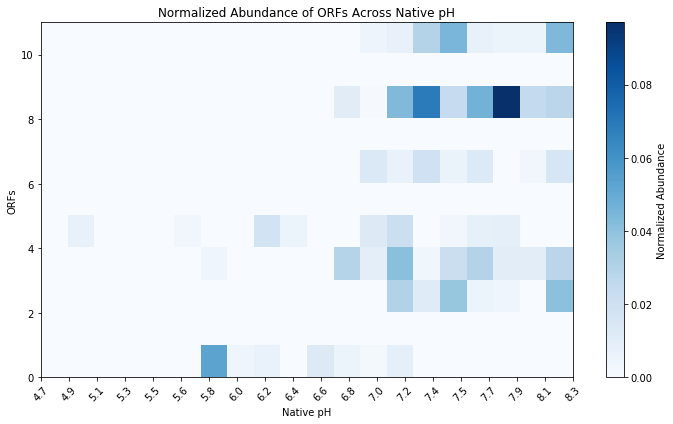

In [4]:
data = pd.read_csv("out/absolute_data_nap.tsv", sep='\t', header=None)
data = data.values
#sorted_data = data[np.argsort(-np.abs(data[:, 0]))]
#normalized_data = sorted_data / sorted_data.sum(axis=1, keepdims=True) #normalization step

x = np.linspace(4.7, 8.3, 20)


plt.figure(figsize=(10, 6))

plt.imshow(data, aspect='auto', cmap='Blues', extent=[x[0], x[-1], 0, data.shape[0]])

plt.xlabel('Native pH')
plt.ylabel('ORFs')
plt.title('Normalized Abundance of ORFs Across Native pH')

plt.colorbar(label='Normalized Abundance')

plt.xticks(ticks=np.linspace(x[0], x[-1], len(x)), labels=[f"{val:.1f}" for val in x], rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#For T0, build a plot with rows which are cluster IDs and columns which are Native pH
ORFs = find_orfs(get_filepath('T0', 'annotation'), 'K02567')
ORF_list = list(ORFs)
print('\n ORFs \n')
print(ORF_list)
Cluster_IDs_nap = ORF_list
for i in range(len(ORF_list)):
    Cluster_IDs_nap[i] = find_cluster_from_orf(ORF_list[i])
    print(Cluster_IDs_nap[i])
print('\n Clusters \n')
print(Cluster_IDs_nap)

IDs = np.array(Cluster_IDs_nap)

sort_indices = np.argsort(-np.abs(data[:, 0])) 

sorted_data = data[sort_indices]
sorted_IDs = IDs[sort_indices]

# Dictionary to accumulate data
id_to_data = {} #given an id, the dictionary spits out the data array
for id, row in zip(sorted_IDs, sorted_data):
    if id in id_to_data:
        id_to_data[id] += row
    else:
        id_to_data[id] = row.copy()

# Reconstruct the arrays
unique_IDs = list(id_to_data.keys())
combined_data = np.array([id_to_data[id] for id in unique_IDs])

np.savetxt("out/cluster_ids_nap.tsv", unique_IDs, delimiter = '\t', fmt = '%s')
np.savetxt("out/clustered_data_nap.tsv", combined_data, delimiter = '\t', fmt = '%0.6f')
    

In [1]:
cluster_IDs = pd.read_csv('out/cluster_ids_nap.tsv', sep='\t', header=None)
clustered_data = pd.read_csv('out/clustered_data_nap.tsv', sep='\t', header=None)
cluster_IDs = cluster_IDs.values
cluster_IDs = [item[0] for item in cluster_IDs]
clustered_data = clustered_data.values
print(cluster_IDs)
print(clustered_data)

normalized_data = clustered_data / clustered_data.sum(axis=1, keepdims=True) #normalization step





plt.figure(figsize=(10, 6))

plt.imshow(normalized_data, aspect='auto', cmap='Blues', extent=[x[0], x[-1], 0, normalized_data.shape[0]])

plt.xlabel('Native pH')
plt.ylabel('Cluster')
plt.title('Normalized Abundance of Clusters Across Native pH')

plt.colorbar(label='Normalized Abundance')
x = np.linspace(4.7, 8.3, 20)
plt.xticks(ticks=np.linspace(x[0], x[-1], len(x)), labels=[f"{val:.1f}" for val in x], rotation=45)

plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]]


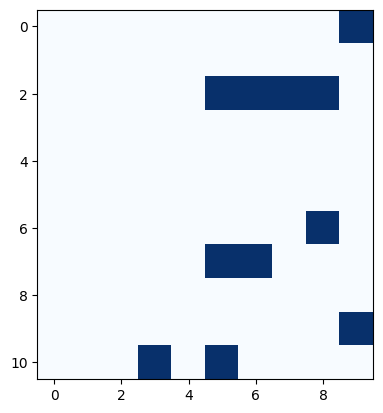

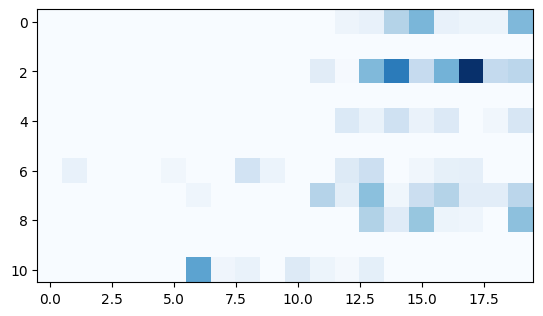

In [8]:
tracking = pd.read_csv('out/track_clusters_nap.tsv', sep = '\t', header = None)
tracking = tracking.values
print(tracking)
plt.imshow(tracking, origin = 'upper', cmap = 'Blues')

clustered_data = pd.read_csv('out/clustered_data_nap.tsv', sep='\t', header=None)
data = clustered_data.values
plt.show()
plt.imshow(data, origin = 'upper', cmap = 'Blues')
plt.show()


Problem: Nap has very little data. But, we need Nap, because it is in the periplasm so maybe it actually responds to the pH perturbation. 

Solution: Long term: do a better (less fine) sequence clustering. this is running. 

Short term: See if we can make the most out of this data. First, cut out the columns of the T0 plot which we don't have T9 data for. Then, cut out the rows which we don't have both T0 and T9 data for. Some rows we have no data for. 

Then, for each of the 5 allelic variants which we have any data for, compile that data. 

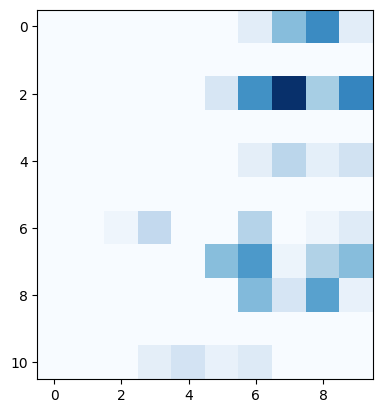

In [9]:
#first, select the columns which we have T9 data for.
selected = [2, 4, 5, 8, 10, 11, 13, 14, 15, 16]
data = data[:, selected]
plt.imshow(data, origin = 'upper', cmap = 'Blues')
plt.show()

In [10]:
#then, select rows which we have T0 and T9 data for. 
rows_selected = [0, 2, 6, 7, 10]
data = data[rows_selected]

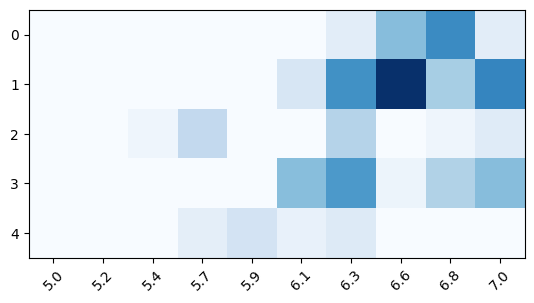

In [ ]:
plt.imshow(data, origin = 'upper', cmap = 'Blues')
x = np.linspace(5, 7, 10)
plt.xticks(ticks=np.linspace(0, 9, len(x)), labels=[f"{val:.1f}" for val in x], rotation=45)
plt.show()



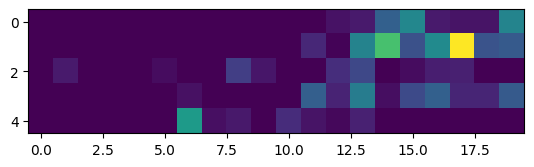

In [15]:
#Sometimes we'll want all of the columns but not all of the rows. 
clustered_data = pd.read_csv('out/clustered_data_nap.tsv', sep='\t', header=None)
data = clustered_data.values
native_data = data[rows_selected]
plt.imshow(native_data)

Variant 1

row 0 of original data

Only T9 data is available for Soil 17

[0.001843 0.009689 0.001576 0.       0.005002 0.005805 0.007439 0.020767
 0.003662 0.009493 0.003744]
[4.135, 4.495, 4.892, 5.553, 5.853, 6.201, 6.622, 7.603, 7.943, 8.339, 8.45]


Text(0, 0.5, 'Absolute Abundance')

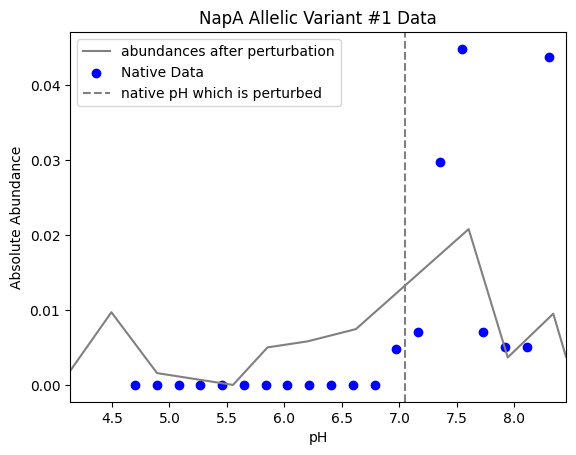

In [81]:
data = pd.read_csv('out/Soil17data_nap.tsv', sep = '\t', header = None)
data = data.values
print(data[0])
y = data[0]
x = perturbed_pHs('Soil17')
print(x)
plt.plot(x, y, color = 'gray', label = 'abundances after perturbation')
x2 = np.linspace(4.7, 8.3, 20)
y2 = native_data[0]
plt.scatter(x2, y2, color = 'blue', label = 'Native Data')
plt.axvline(x = native_pH('Soil17'), color = 'gray', linestyle = '--', label = 'native pH which is perturbed')
plt.legend()
plt.title('NapA Allelic Variant #1 Data')
plt.xlim(min(x), max(x))
plt.xlabel('pH')
plt.ylabel('Absolute Abundance')

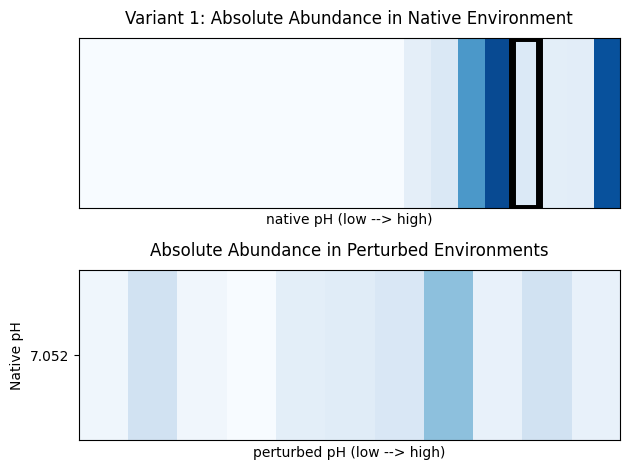

In [99]:
import matplotlib.patches as patches

variant1data = np.zeros((1, 11))
natdata= native_data[0]

data = pd.read_csv('out/Soil17data_nap.tsv', sep = '\t', header = None)
data = data.values
variant1data[0] = data[0]


fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 1]})

ax1.imshow([natdata], aspect='auto', cmap = 'Blues', extent=[0, 20, 0, 1], vmin = 0, vmax = 0.05)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('native pH (low --> high)')

ax1.set_title('Variant 1: Absolute Abundance in Native Environment', pad=10) 

highlight_x = 16
rect = patches.Rectangle(
    (highlight_x, 0),  # (x, y) of lower-left corner
    1,  # width
    1,  # height
    linewidth=5,
    edgecolor='black',
    facecolor='none'
)
ax1.add_patch(rect)


# Other rows (bottom subplot)
ax2.imshow(variant1data, aspect='auto', cmap = 'Blues', extent=[0, 10, 0, 1], vmin = 0, vmax = 0.05)
ax2.set_xticks([])
ax2.set_ylabel('Native pH')
ax2.set_yticks([0.5], labels=[native_pH('Soil17')])
ax2.set_xlabel('perturbed pH (low --> high)')

ax2.set_title('Absolute Abundance in Perturbed Environments', pad=10) 

plt.tight_layout()
plt.show()


Variant 2

row 2 of original data

We have perturbed data for 4 native pHs (12,14,15,16) / (5,6,7,8).

But the above plot looks stupid, so I need a new method of plotting. Going to show plt.imshow() style.

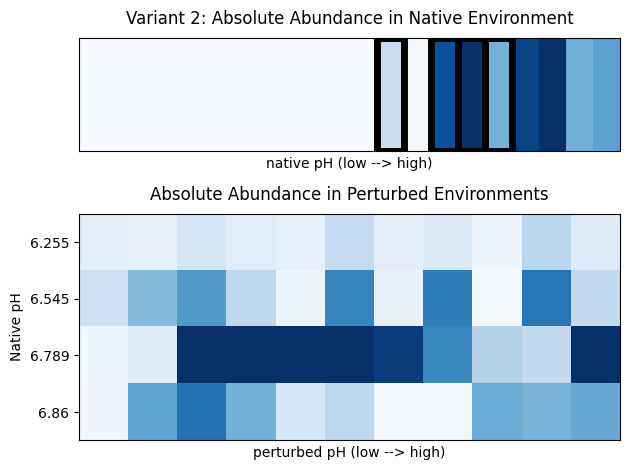

In [100]:
import matplotlib.patches as patches

variant2data = np.zeros((4, 11))
natdata= native_data[1]

data = pd.read_csv('out/Soil12data_nap.tsv', sep = '\t', header = None)
data = data.values
variant2data[0] = data[2]

data = pd.read_csv('out/Soil14data_nap.tsv', sep = '\t', header = None)
data = data.values
variant2data[1] = data[2]

data = pd.read_csv('out/Soil15data_nap.tsv', sep = '\t', header = None)
data = data.values
variant2data[2] = data[2]

data = pd.read_csv('out/Soil16data_nap.tsv', sep = '\t', header = None)
data = data.values
variant2data[3] = data[2]


fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 2]})

ax1.imshow([natdata], aspect='auto', cmap = 'Blues', extent=[0, 20, 0, 1], vmin = 0, vmax = 0.05)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('native pH (low --> high)')

ax1.set_title('Variant 2: Absolute Abundance in Native Environment', pad=10) 

highlight_x = 11
rect = patches.Rectangle(
    (highlight_x, 0),  # (x, y) of lower-left corner
    1,  # width
    1,  # height
    linewidth=5,
    edgecolor='black',
    facecolor='none'
)
ax1.add_patch(rect)

highlight_x = 13
rect = patches.Rectangle(
    (highlight_x, 0),  # (x, y) of lower-left corner
    1,  # width
    1,  # height
    linewidth=5,
    edgecolor='black',
    facecolor='none'
)
ax1.add_patch(rect)

highlight_x = 14
rect = patches.Rectangle(
    (highlight_x, 0),  # (x, y) of lower-left corner
    1,  # width
    1,  # height
    linewidth=5,
    edgecolor='black',
    facecolor='none'
)
ax1.add_patch(rect)

highlight_x = 15
rect = patches.Rectangle(
    (highlight_x, 0),  # (x, y) of lower-left corner
    1,  # width
    1,  # height
    linewidth=5,
    edgecolor='black',
    facecolor='none'
)
ax1.add_patch(rect)

# Other rows (bottom subplot)
ax2.imshow(variant2data, aspect='auto', cmap = 'Blues', extent=[0, 10, 0, 4], vmin = 0, vmax = 0.05)
ax2.set_xticks([])
ax2.set_ylabel('Native pH')
ax2.set_yticks([3.5, 2.5, 1.5, 0.5], labels=[native_pH('Soil12'), native_pH('Soil14'), native_pH('Soil15'), native_pH('Soil16')])
ax2.set_xlabel('perturbed pH (low --> high)')

ax2.set_title('Absolute Abundance in Perturbed Environments', pad=10) 

plt.tight_layout()
plt.show()


Variant 3

row 6 of original data

We only have perturbed data for Soil 16

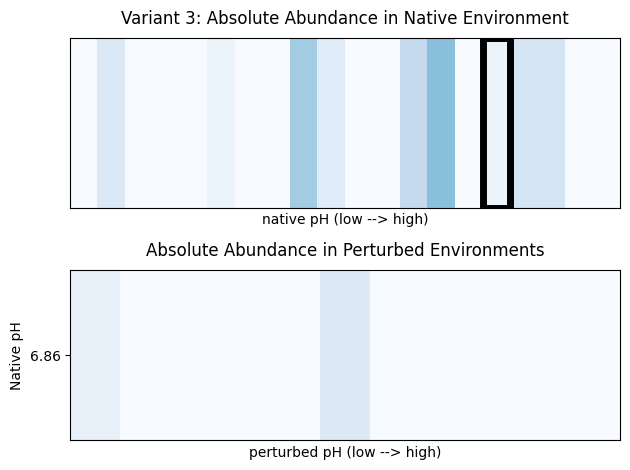

In [101]:
import matplotlib.patches as patches

variant3data = np.zeros((1, 11))
natdata = native_data[2]

data = pd.read_csv('out/Soil16data_nap.tsv', sep = '\t', header = None)
data = data.values
variant3data[0] = data[6]


fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 1]})

ax1.imshow([natdata], aspect='auto', cmap = 'Blues', extent=[0, 20, 0, 1], vmin = 0, vmax = 0.05)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('native pH (low --> high)')

ax1.set_title('Variant 3: Absolute Abundance in Native Environment', pad=10) 

highlight_x = 15
rect = patches.Rectangle(
    (highlight_x, 0),  # (x, y) of lower-left corner
    1,  # width
    1,  # height
    linewidth=5,
    edgecolor='black',
    facecolor='none'
)
ax1.add_patch(rect)


# Other rows (bottom subplot)
ax2.imshow(variant3data, aspect='auto', cmap = 'Blues', extent=[0, 10, 0, 1], vmin = 0, vmax = 0.05)
ax2.set_xticks([])
ax2.set_ylabel('Native pH')
ax2.set_yticks([0.5], labels=[native_pH('Soil16')])
ax2.set_xlabel('perturbed pH (low --> high)')

ax2.set_title('Absolute Abundance in Perturbed Environments', pad=10) 

plt.tight_layout()
plt.show()


Variant 4

Row 7 in original data

We have data for soils 12 and 14

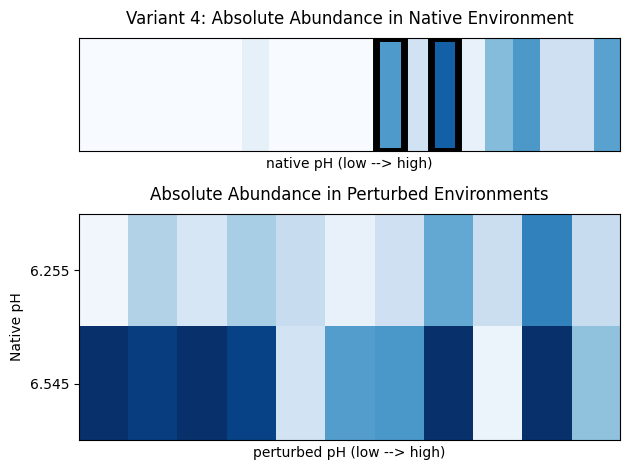

In [102]:
import matplotlib.patches as patches

variant4data = np.zeros((2, 11))
natdata= native_data[3]

data = pd.read_csv('out/Soil12data_nap.tsv', sep = '\t', header = None)
data = data.values
variant4data[0] = data[7]

data = pd.read_csv('out/Soil14data_nap.tsv', sep = '\t', header = None)
data = data.values
variant4data[1] = data[7]



fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 2]})

ax1.imshow([natdata], aspect='auto', cmap = 'Blues', extent=[0, 20, 0, 1], vmin = 0, vmax = 0.05)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('native pH (low --> high)')

ax1.set_title('Variant 4: Absolute Abundance in Native Environment', pad=10) 

highlight_x = 11
rect = patches.Rectangle(
    (highlight_x, 0),  # (x, y) of lower-left corner
    1,  # width
    1,  # height
    linewidth=5,
    edgecolor='black',
    facecolor='none'
)
ax1.add_patch(rect)

highlight_x = 13
rect = patches.Rectangle(
    (highlight_x, 0),  # (x, y) of lower-left corner
    1,  # width
    1,  # height
    linewidth=5,
    edgecolor='black',
    facecolor='none'
)
ax1.add_patch(rect)

# Other rows (bottom subplot)
ax2.imshow(variant4data, aspect='auto', cmap = 'Blues', extent=[0, 10, 0, 4], vmin = 0, vmax = 0.05)
ax2.set_xticks([])
ax2.set_ylabel('Native pH')
ax2.set_yticks([3, 1], labels=[native_pH('Soil12'), native_pH('Soil14')])
ax2.set_xlabel('perturbed pH (low --> high)')

ax2.set_title('Absolute Abundance in Perturbed Environments', pad=10) 

plt.tight_layout()
plt.show()


Variant 5

row 10 in the original data

present in soils 9 and 12

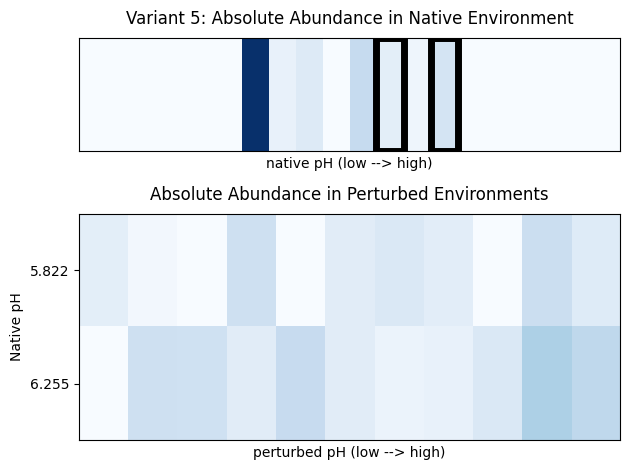

In [103]:
import matplotlib.patches as patches

variant5data = np.zeros((2, 11))
natdata= native_data[4]

data = pd.read_csv('out/Soil9data_nap.tsv', sep = '\t', header = None)
data = data.values
variant5data[0] = data[10]

data = pd.read_csv('out/Soil12data_nap.tsv', sep = '\t', header = None)
data = data.values
variant5data[1] = data[10]



fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 2]})

ax1.imshow([natdata], aspect='auto', cmap = 'Blues', extent=[0, 20, 0, 1], vmin = 0, vmax = 0.05)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('native pH (low --> high)')

ax1.set_title('Variant 5: Absolute Abundance in Native Environment', pad=10) 

highlight_x = 11
rect = patches.Rectangle(
    (highlight_x, 0),  # (x, y) of lower-left corner
    1,  # width
    1,  # height
    linewidth=5,
    edgecolor='black',
    facecolor='none'
)
ax1.add_patch(rect)

highlight_x = 13
rect = patches.Rectangle(
    (highlight_x, 0),  # (x, y) of lower-left corner
    1,  # width
    1,  # height
    linewidth=5,
    edgecolor='black',
    facecolor='none'
)
ax1.add_patch(rect)

# Other rows (bottom subplot)
ax2.imshow(variant5data, aspect='auto', cmap = 'Blues', extent=[0, 10, 0, 4], vmin = 0, vmax = 0.05)
ax2.set_xticks([])
ax2.set_ylabel('Native pH')
ax2.set_yticks([3, 1], labels=[native_pH('Soil9'), native_pH('Soil12')])
ax2.set_xlabel('perturbed pH (low --> high)')

ax2.set_title('Absolute Abundance in Perturbed Environments', pad=10) 

plt.tight_layout()
plt.show()
